In [1]:
import pandas_datareader as dr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define global variables and read data

In [2]:
obvStart = '2008-01-01' #Period of observations where we base our decisions off
obvEnd = '2018-01-01' #Period of observations where we base our decisions off
testStart = '2018-01-01'
testEnd = '2021-05-01'

startingCapital = 10000

In [3]:
data = dr.DataReader('ES3.SI', data_source='yahoo', start=obvStart, end=obvEnd)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-02,3.54730,3.54730,3.54730,3.54730,0.0,3.54730
2008-01-03,3.48305,3.48305,3.48305,3.48305,0.0,3.48305
2008-01-04,3.52404,3.52404,3.52404,3.52404,0.0,3.52404
2008-01-07,3.43901,3.43901,3.43901,3.43901,0.0,3.43901
2008-01-08,3.42421,3.42421,3.42421,3.42421,0.0,3.42421


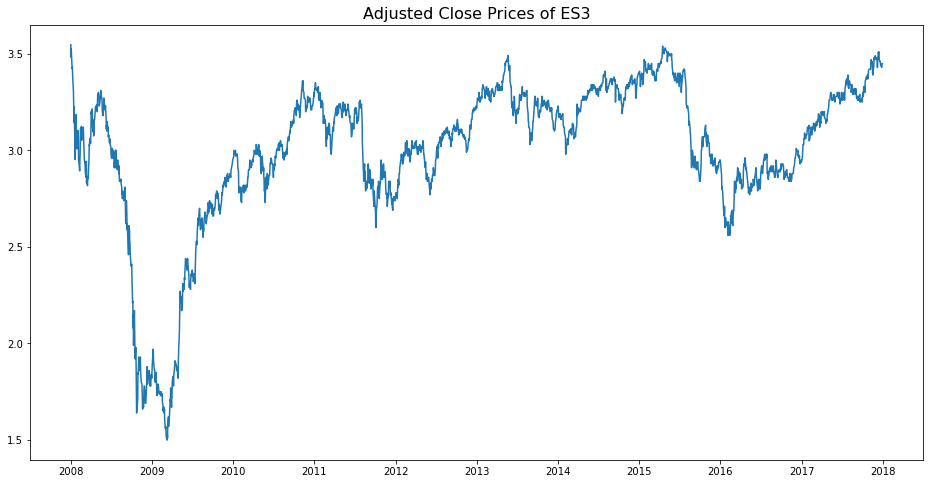

In [4]:
plt.figure(figsize=(16, 8))
plt.title('Adjusted Close Prices of ES3', fontsize=16)
plt.plot(data['Adj Close'])
plt.show()

# Generate dataframe of log returns

In [5]:
logReturns = np.log(data).diff()
logReturns.rename(columns={'Adj Close': 'Daily Returns'}, inplace=True)
logReturns['Month'] = logReturns.index.month
logReturns = logReturns[['Daily Returns', 'Month']]
logReturns.dropna(inplace=True)
logReturns.head()

C:\Users\nigel\Anaconda3\envs\WorkingEnv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,Daily Returns,Month
Date,,
2008-01-03,-0.018278,1
2008-01-04,0.011700,1
2008-01-07,-0.024424,1
2008-01-08,-0.004313,1
2008-01-09,0.001719,1


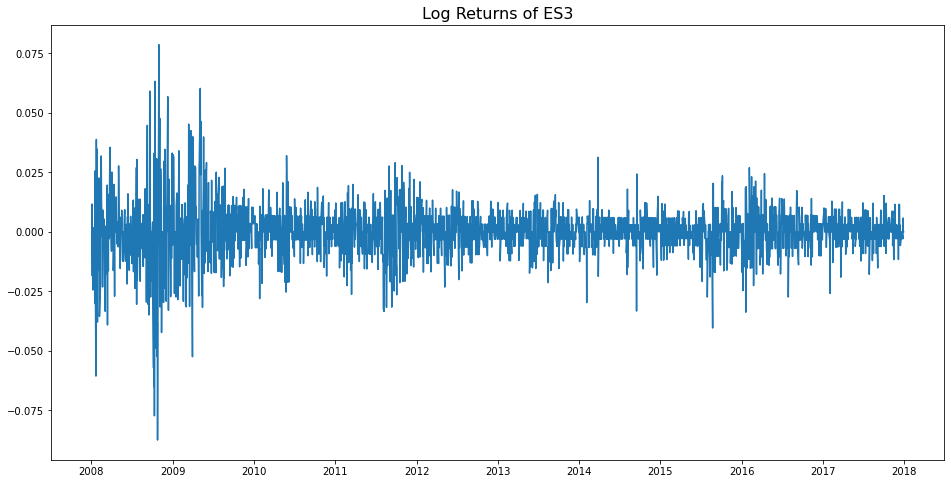

In [6]:
plt.figure(figsize=(16, 8))
plt.title('Log Returns of ES3', fontsize=16)
plt.plot(logReturns['Daily Returns'])
plt.show()

# The (very simple) basis of the strategy

In [7]:
logReturns.groupby(lambda x: x.month).mean()['Daily Returns']

1    -0.001163
2    -0.000641
3     0.001292
4     0.001384
5     0.000502
6    -0.000475
7     0.001042
8    -0.001677
9    -0.000682
10   -0.000372
11   -0.000057
12    0.000543
Name: Daily Returns, dtype: float64

# Run simulation over the "train data"

In [8]:
trainPortfolioValue = pd.DataFrame(columns=['Default Pf Value', 'Strategic Pf Value'])
trainPortfolioValue['Default Pf Value'] = logReturns['Daily Returns'].add(1).cumprod()*startingCapital
#trainPortfolioValue

In [9]:
logReturns['Strategic Pf Returns'] = logReturns.apply(lambda x: 0 if x['Month'] in [1, 2, 6, 8, 9,10, 11] else x['Daily Returns'], axis=1 )
logReturns.head()

,Daily Returns,Month,Strategic Pf Returns
Date,,,
2008-01-03,-0.018278,1,0.0
2008-01-04,0.011700,1,0.0
2008-01-07,-0.024424,1,0.0
2008-01-08,-0.004313,1,0.0
2008-01-09,0.001719,1,0.0


In [10]:
trainPortfolioValue['Strategic Pf Value'] = logReturns['Strategic Pf Returns'].add(1).cumprod()*startingCapital
trainPortfolioValue

,Default Pf Value,Strategic Pf Value
Date,,
2008-01-03,9817.215987,10000.000000
2008-01-04,9932.074237,10000.000000
2008-01-07,9689.488861,10000.000000
2008-01-08,9647.700009,10000.000000
2008-01-09,9664.280505,10000.000000
...,...,...
2017-12-22,8307.593502,26055.405971
2017-12-26,8283.408374,25979.553280
2017-12-27,8331.567814,26130.597474


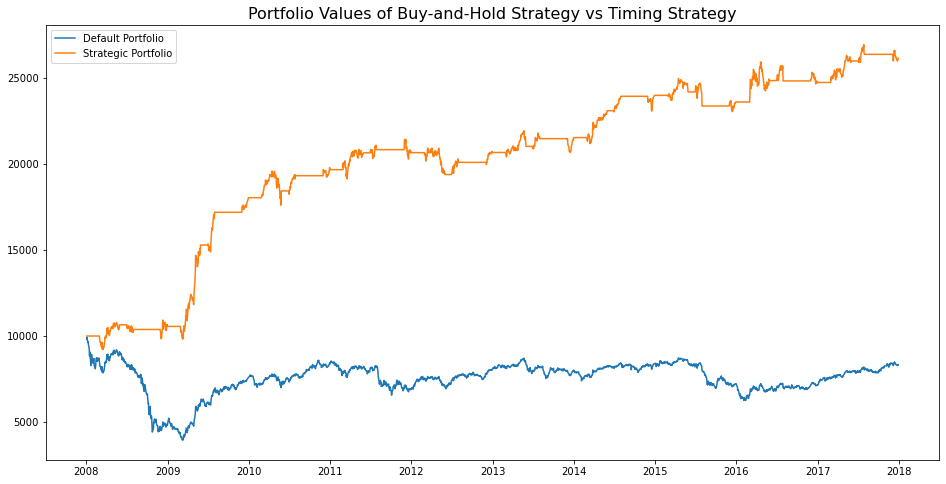

In [11]:
plt.figure(figsize=(16, 8))
plt.plot(trainPortfolioValue)
plt.title('Portfolio Values of Buy-and-Hold Strategy vs Timing Strategy', fontsize=16)
plt.legend(['Default Portfolio', 'Strategic Portfolio'])
plt.show()

# Run simulation for the "test data"

In [12]:
testData = dr.DataReader('ES3.SI', data_source='yahoo', start=testStart, end=testEnd)
testData.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,3.48,3.45,3.45,3.48,129700.0,3.48
2018-01-03,3.52,3.48,3.48,3.52,311800.0,3.52
2018-01-04,3.54,3.51,3.52,3.54,295800.0,3.54
2018-01-05,3.55,3.53,3.54,3.54,189900.0,3.54
2018-01-08,3.56,3.54,3.54,3.56,356200.0,3.56


In [13]:
logReturnsTest = np.log(testData).diff()
logReturnsTest.rename(columns={'Adj Close': 'Test Daily Returns'}, inplace=True)
logReturnsTest['Month'] = logReturnsTest.index.month
logReturnsTest = logReturnsTest[['Test Daily Returns', 'Month']]
logReturnsTest.dropna(inplace=True)
logReturnsTest.head()

C:\Users\nigel\Anaconda3\envs\WorkingEnv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,Test Daily Returns,Month
Date,,
2018-01-03,0.011429,1
2018-01-04,0.005666,1
2018-01-05,0.000000,1
2018-01-08,0.005634,1
2018-01-09,0.002805,1


In [14]:
testPortfolioValue = pd.DataFrame(columns=['Default Pf Value', 'Strategic Pf Value'])
testPortfolioValue['Default Pf Value'] = logReturnsTest['Test Daily Returns'].add(1).cumprod()*startingCapital
#testPortfolioValue

In [15]:
logReturnsTest['Strategic Pf Returns'] = logReturnsTest.apply(lambda x: 0 if x['Month'] in [1, 2, 6, 8, 9,10, 11] else x['Test Daily Returns'], axis=1)
logReturnsTest

,Test Daily Returns,Month,Strategic Pf Returns
Date,,,
2018-01-03,0.011429,1,0.000000
2018-01-04,0.005666,1,0.000000
2018-01-05,0.000000,1,0.000000
2018-01-08,0.005634,1,0.000000
2018-01-09,0.002805,1,0.000000
...,...,...,...
2021-04-26,0.004679,4,0.004679
2021-04-27,0.003108,4,0.003108
2021-04-28,0.000620,4,0.000620


In [16]:
testPortfolioValue['Strategic Pf Value'] = logReturnsTest['Strategic Pf Returns'].add(1).cumprod()*startingCapital
testPortfolioValue

,Default Pf Value,Strategic Pf Value
Date,,
2018-01-03,10114.286849,10000.000000
2018-01-04,10171.591690,10000.000000
2018-01-05,10171.591690,10000.000000
2018-01-08,10228.896529,10000.000000
2018-01-09,10257.589078,10000.000000
...,...,...
2021-04-26,8829.791701,8975.443599
2021-04-27,8857.230452,9003.334967
2021-04-28,8862.724614,9008.919758


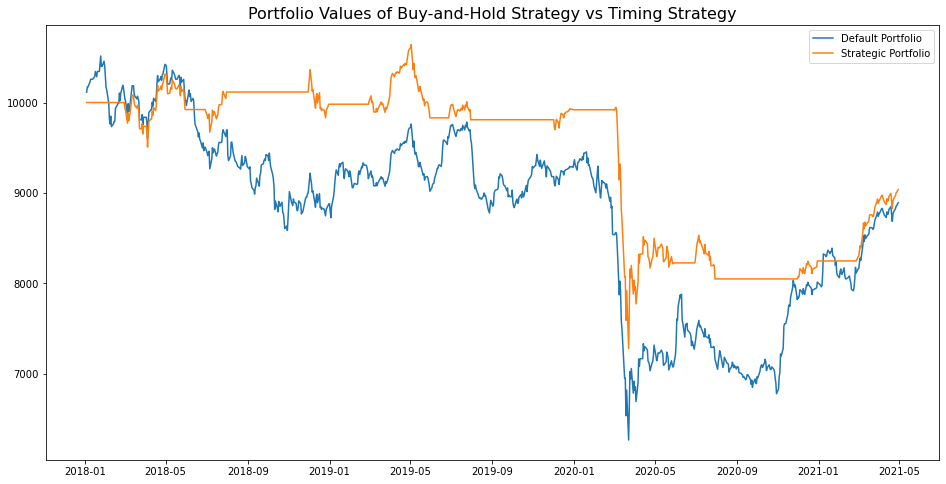

In [17]:
plt.figure(figsize=(16, 8))
plt.title('Portfolio Values of Buy-and-Hold Strategy vs Timing Strategy', fontsize=16)
plt.plot(testPortfolioValue)
plt.legend(['Default Portfolio', 'Strategic Portfolio'])
plt.show()